# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import calendar
import numpy as np

# Import Files

In [2]:
filename = ["202112-divvy-tripdata", "202201-divvy-tripdata","202202-divvy-tripdata", "202203-divvy-tripdata",\
           "202204-divvy-tripdata","202205-divvy-tripdata","202206-divvy-tripdata","202207-divvy-tripdata",\
           "202208-divvy-tripdata","202209-divvy-publictripdata","202210-divvy-tripdata","202211-divvy-tripdata"] # file names

df_variable = [] 
for i in range(0,13): 
    df_variable.append("df" + str(i) ) 

for i,ind in zip(filename,range(0,13)):
    filename[ind] = i + '.csv' 

for d,f in zip(df_variable,filename): # looping through filename and variables name 
    globals()[d] = pd.read_csv(f) # convert strings into variable and read the files
   

# Transformation

In [3]:
def analysis(data):

    data.started_at = pd.to_datetime(data.started_at) # convert column to daat time object
    data.ended_at = pd.to_datetime(data.ended_at) # same 
    data["WeekDay"]= data.started_at.dt.weekday # create a weekday column 
    data["rideLength"] = round(((data.ended_at - data.started_at).dt.seconds)/60,2) # creat a ride length column
    data = data.dropna() # drop empty rows
    
    # calculate the distance by using latitude and longitude
    def distance(lat1, lat2, lon1, lon2):
     
        # The math module contains a function named
        # radians which converts from degrees to radians.
        lon1 = radians(lon1)
        lon2 = radians(lon2)
        lat1 = radians(lat1)
        lat2 = radians(lat2)

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

        c = 2 * asin(sqrt(a))

        # Radius of earth in kilometers. Use 3956 for miles
        r = 6371

        # calculate the result
        return(c * r)
    

    ride_length = []
    for lat1,lat2,lon1,lon2, in zip(data.start_lat,data.end_lat,data.start_lng,data.end_lng):
        x = distance(lat1,lat2,lon1,lon2)
        ride_length.append(x)
        
    ride = []
    for i in ride_length:
        ride.append(round(i,2))
        
    data["distance_KM"] = ride
    
    
    return data

In [4]:
def analysis1(data):

    data.started_at = pd.to_datetime(data.started_at) # convert column to daat time object
    data.ended_at = pd.to_datetime(data.ended_at) # same 
    data["WeekDay"]= data.started_at.dt.weekday # create a weekday column 
    data["rideLength"] = round(((data.ended_at - data.started_at).dt.seconds)/60,2) # creat a ride length column
    data = data.dropna() # drop empty rows
    
    # calculate the distance by using latitude and longitude
    def distance(lat1, lat2, lon1, lon2):
     
        # The math module contains a function named
        # radians which converts from degrees to radians.
        lon1 = radians(lon1)
        lon2 = radians(lon2)
        lat1 = radians(lat1)
        lat2 = radians(lat2)

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

        c = 2 * asin(sqrt(a))

        # Radius of earth in kilometers. Use 3956 for miles
        r = 6371

        # calculate the result
        return(c * r)
    

    ride_length = []
    for lat1,lat2,lon1,lon2, in zip(data.start_lat,data.end_lat,data.start_lng,data.end_lng):
        x = distance(lat1,lat2,lon1,lon2)
        ride_length.append(x)
        
    ride = []
    for i in ride_length:
        ride.append(round(i,2))
        
    data["distance_KM"] = ride
    
    return data.groupby(['member_casual','WeekDay'])['rideLength'].agg(['mean'])

In [5]:
for i in (df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11):
    analysis(i)

F:\New folder\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Time series chart of number of rides booked monthly

In [6]:
casual_rides = pd.Series()
for month,i in zip(calendar.month_name[12:] + calendar.month_name[:12][1:],([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])):
    x = i.groupby('member_casual').get_group('casual').ride_id.count()
    casual_rides[month] = x
    

In [7]:
member_rides = pd.Series()
for month,i in zip(calendar.month_name[12:] + calendar.month_name[:12][1:],([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])):
    x = i.groupby('member_casual').get_group('member').ride_id.count()
    member_rides[month] = x

In [8]:
member_rides = pd.DataFrame(member_rides).reset_index()

In [9]:
member_rides.columns = ['month','numRides']

In [10]:
casual_rides = pd.DataFrame(casual_rides).reset_index()

In [11]:
casual_rides.columns = ['month','numRides']

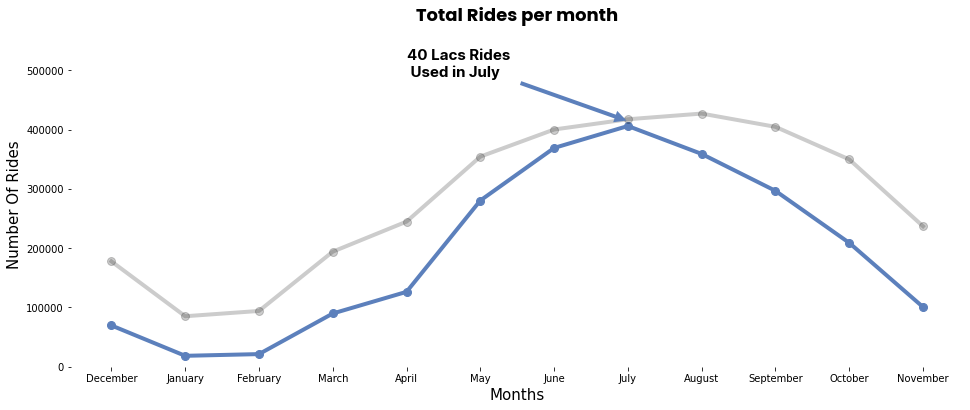

In [71]:
plt.figure(figsize=(16,6))
plt.plot(casual_rides.month,casual_rides.numRides,linewidth=4,marker='o',markersize=8,color='#5C80BC',)
plt.plot(member_rides.month,member_rides.numRides,alpha=0.2,marker='o',markersize=8,color = '#040403',lw=4)

ax = plt.gca()
for i in ['top','right','left','bottom']:
    ax.spines[i].set_visible(False)
plt.title('Total Rides per month',weight='bold',size=18,fontdict={'family':'poppins'},pad=20,color='black')
plt.annotate('40 Lacs Rides\n Used in July', xy=(7.1,410000),xytext=(4,490000), arrowprops=dict(fc='#5C80BC',shrink=0.07,ec='none')\
            ,color='black',size=15,weight='bold',family='Inter')
plt.ylim([0,550000])
plt.xlabel('Months',size=15)
plt.ylabel('Number Of Rides',size=15)


plt.savefig('plot2.png',facecolor='none',edgecolor='none',transparent=True)

# Comparison of average number of rides per weekday

In [13]:
summary_summer = df0.groupby(['member_casual','WeekDay'])['ride_id'].agg(['count']).drop(['count'],axis=1)

In [14]:
for month,df in zip(calendar.month_name[5:11],[df5,df6,df7,df8,df9,df10]):
            summary_summer[month] = df.groupby(['member_casual','WeekDay'])['ride_id'].agg(['count'])['count'].values

In [15]:
summary_winter = df0.groupby(['member_casual','WeekDay'])['ride_id'].agg(['count']).drop(['count'],axis=1)

In [16]:
for month,df in zip(calendar.month_name[11:13] + calendar.month_name[1:5],[df11,df0,df1,df2,df3,df4]):
            summary_winter[month] = df.groupby(['member_casual','WeekDay'])['ride_id'].agg(['count'])['count'].values

In [17]:
mean = []
for i in range(0,14):
    mean.append(summary_summer.iloc[i,0:6].mean())

In [18]:
summary_summer['avg_numRides'] = mean
summary_summer = summary_summer.reset_index()

In [19]:
summer_rides_casual = summary_summer[summary_summer.member_casual == 'casual']
summer_rides_members = summary_summer[summary_summer.member_casual == 'member']

In [20]:
mean_winter = []
for i in range(0,14):
    mean_winter.append(summary_winter.iloc[i,0:6].mean())

In [21]:
summary_winter['avg_numRides'] = mean_winter
summary_winter = summary_winter.reset_index()

In [22]:
summer_rides_casual_winter = summary_winter[summary_winter.member_casual == 'casual']
summer_rides_members_winter = summary_winter[summary_winter.member_casual == 'member']

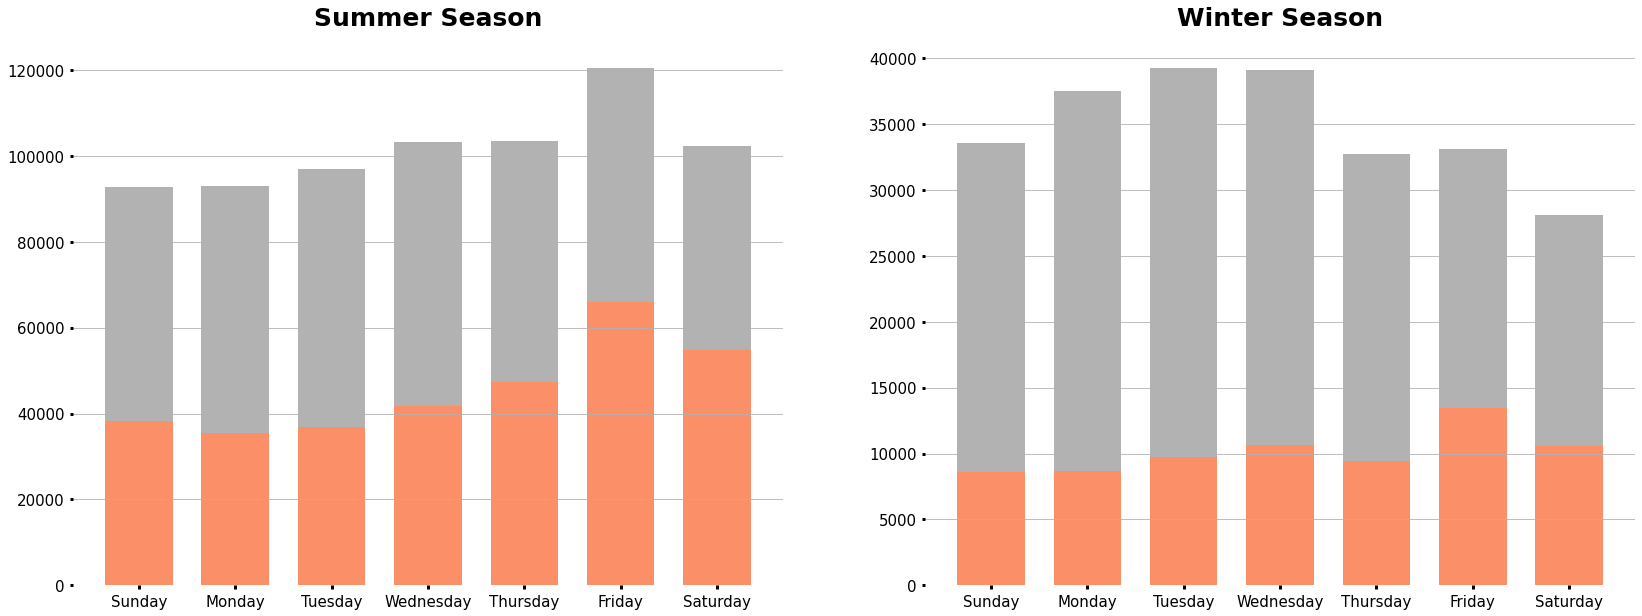

In [72]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(28,10))
ax1.bar(summer_rides_casual.WeekDay,summer_rides_casual.avg_numRides,color='#FB8F67',width=0.7)
ax1.bar(summer_rides_casual.WeekDay,summer_rides_members.avg_numRides, bottom=summer_rides_casual.avg_numRides,color='black'\
       ,alpha = 0.3,width=0.7)
ax1.set_xticks([0,1,2,3,4,5,6],['Sunday','Monday',"Tuesday",'Wednesday','Thursday','Friday','Saturday'])
ax1.text(3,132000,'Summer Season',weight='bold',fontsize='25',horizontalalignment='center',verticalalignment='center',color='black')
ax1.tick_params(axis='x',labelsize=15)
for i in ['top','left','right','bottom']:
    ax1.spines[i].set_visible(False)
ax1.tick_params(axis='x',labelsize=15,width=3,pad=5)
ax1.tick_params(axis='y',labelsize=15,width=3,pad=5)
ax1.grid(axis='y')


ax2.bar(summer_rides_casual_winter.WeekDay, summer_rides_casual_winter.avg_numRides,color='#FB8F67',width=0.7)
ax2.bar(summer_rides_casual_winter.WeekDay, summer_rides_members_winter.avg_numRides, bottom= \
       summer_rides_casual_winter.avg_numRides,color='black',alpha=0.3,width=0.7)
ax2.set_xticks([0,1,2,3,4,5,6],['Sunday','Monday',"Tuesday",'Wednesday','Thursday','Friday','Saturday'])
ax2.text(3,43000,'Winter Season',weight='bold',fontsize='25',horizontalalignment='center',verticalalignment='center',color='black')
ax2.tick_params(axis='x',labelsize=15,width=3,pad=5)
ax2.tick_params(axis='y',labelsize=15,width=3,pad=5)
ax2.grid(axis='y')

for i in ['top','left','right','bottom']:
    ax2.spines[i].set_visible(False)
    



plt.savefig('bar1.png',facecolor='none',edgecolor='none',transparent=True)

In [24]:
for i,df in zip(['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11'],[df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]):
     globals()[i] = analysis1(df)

F:\New folder\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
mean_ridetime = d0.merge(d1,how='inner',on=['member_casual','WeekDay']).\
    merge(d2,how='inner',on=['member_casual','WeekDay']).\
    merge(d3,how='inner',on=['member_casual','WeekDay']).\
    merge(d4,how='inner',on=['member_casual','WeekDay']).\
    merge(d5,how='inner',on=['member_casual','WeekDay']).\
    merge(d6,how='inner',on=['member_casual','WeekDay']).\
    merge(d7,how='inner',on=['member_casual','WeekDay']).\
    merge(d8,how='inner',on=['member_casual','WeekDay']).\
    merge(d9,how='inner',on=['member_casual','WeekDay']).\
    merge(d10,how='inner',on=['member_casual','WeekDay']).\
    merge(d11,how='inner',on=['member_casual','WeekDay'])

In [26]:
Avgride_time = []
for i in range(0,14):   
    x = mean_ridetime.iloc[i,0:13].mean()
    Avgride_time.append(x)

In [27]:
mean_ridetime['Avg_time'] = Avgride_time

In [28]:
Avg_ridetime_casual = mean_ridetime.loc['casual']['Avg_time']
Avg_ridetime_member = mean_ridetime.loc['member']['Avg_time']

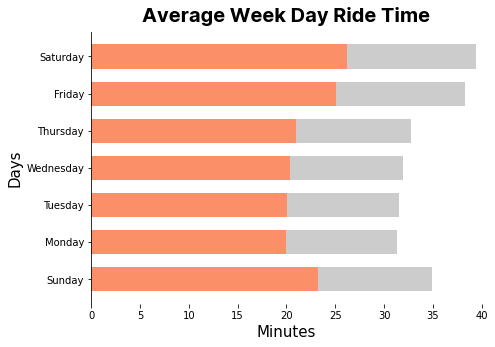

In [73]:
plt.figure(figsize=(7,5))
plt.barh(Avg_ridetime_casual.index, Avg_ridetime_casual.values,height=0.65,color='#FB8F67')
plt.barh(Avg_ridetime_casual.index, Avg_ridetime_member.values, left=Avg_ridetime_casual.values, alpha=0.2, color='black',height=0.65)
plt.yticks([0,1,2,3,4,5,6],['Sunday','Monday',"Tuesday",'Wednesday','Thursday','Friday','Saturday'])
plt.title('Average Week Day Ride Time', weight='bold',size=20,fontdict={'family':'Inter'},pad=10)
plt.xlim([0,40])
abc= plt.gca()
for i in ['top','bottom','right']:
    abc.spines[i].set_visible(False)
plt.xlabel('Minutes',size=15)
plt.ylabel('Days',size=15)


plt.savefig('bar1.png',facecolor='none',edgecolor='none',transparent=True)

In [30]:
# Most common stations in top 3
popular_stations = []
for i in [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]:
    x = i.groupby('member_casual').get_group('casual')['start_station_name'].value_counts().nlargest(1)
    popular_stations.append(x)
    

In [31]:
popular_stations

[DuSable Lake Shore Dr & Monroe St    983
 Name: start_station_name, dtype: int64, Clark St & Elm St    127
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    198
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    2399
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    3033
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    7743
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    9608
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    11794
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    9651
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    7016
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    4391
 Name: start_station_name, dtype: int64, Streeter Dr & Grand Ave    1732
 Name: start_station_name, dtype: int64]

### Most used station among casual is Streeter Dr & Grand Ave station

In [32]:
popular_bike_casual = []
for i in [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]:
    x = i.groupby(['member_casual','rideable_type'])['rideable_type'].value_counts().loc['casual'].nlargest(1)
    popular_bike_casual.append(x)

In [33]:
popular_bike_casual

[rideable_type  rideable_type
 electric_bike  electric_bike    45004
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    10585
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    11948
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    46137
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    66758
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    127931
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 classic_bike   classic_bike     169996
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    218905
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike    203966
 Name: rideable_type, dtype: int64, rideable_type  rideable_type
 electric_bike  electric_bike 

### Mostly bike used by casual is electric bike

In [34]:
df0 = analysis(df0)

F:\New folder\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
for i in [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]:
    x = analysis(i).groupby(['member_casual','rideable_type'])['distance_KM'].sum().loc['casual']
    print(x.nlargest(1))

rideable_type
electric_bike    42687.44
Name: distance_KM, dtype: float64


F:\New folder\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


rideable_type
classic_bike    10765.56
Name: distance_KM, dtype: float64
rideable_type
classic_bike    13643.79
Name: distance_KM, dtype: float64
rideable_type
classic_bike    71901.45
Name: distance_KM, dtype: float64
rideable_type
classic_bike    98408.87
Name: distance_KM, dtype: float64
rideable_type
classic_bike    268646.0
Name: distance_KM, dtype: float64
rideable_type
classic_bike    359681.54
Name: distance_KM, dtype: float64
rideable_type
classic_bike    331365.94
Name: distance_KM, dtype: float64
rideable_type
classic_bike    269891.35
Name: distance_KM, dtype: float64
rideable_type
classic_bike    218272.79
Name: distance_KM, dtype: float64
rideable_type
electric_bike    163321.42
Name: distance_KM, dtype: float64
rideable_type
electric_bike    78754.43
Name: distance_KM, dtype: float64


### Classic bikes are most preferable among casual for covering large distance 

In [36]:
for var,i in zip(['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11'],[df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]):
     globals()[var] = pd.DataFrame(i.groupby(['member_casual','rideable_type'])['ride_id'].count()).loc['casual']


bikeCasuals = pd.concat([f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11],axis=1)

bikeCasuals = pd.DataFrame((bikeCasuals.mean(axis=1))).reset_index()

bikeCasuals.columns = ['rideType','Avgcount']

F:\New folder\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fc" which is no longer supported as of 3.3 and will become an error in 3.6
  This is separate from the ipykernel package so we can avoid doing imports until
F:\New folder\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ec" which is no longer supported as of 3.3 and will become an error in 3.6
  This is separate from the ipykernel package so we can avoid doing imports until


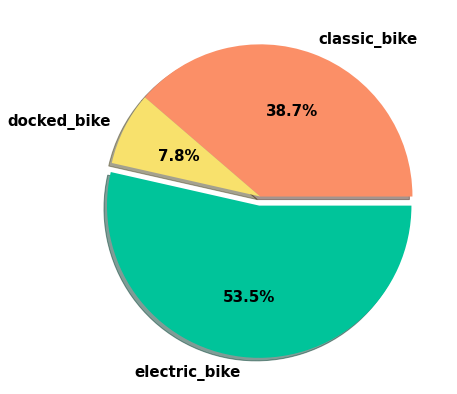

In [74]:
plt.figure(figsize=(7,7))
plt.pie(bikeCasuals['Avgcount'],labels=bikeCasuals['rideType'],colors=['#FB8F67','#F8E16C','#00C49A'],explode=(0,0,0.06)\
       ,shadow=True,autopct='%1.1f%%',textprops = {"color":'black','size':15,"weight":'bold'})
plt.savefig('pie.png',fc='none',ec='none',transparent=True)